This text came from notebook.ipynb

In [1]:
%matplotlib inline

In [2]:
for i in range(3):
    print(i)

0
1
2


In [4]:
for i in range(3, 6):
    print(i)

3
4
5


In [5]:
print('a')

a


In [10]:
(1, 2)

Simpson's rule is a method of numeric integration, as opposed to analytics methods of integration, specifically it is this approximation:
$$\int_a^b f(x) dx \approx \frac{b-a}{6}\left(f(a)+4f\left(\tfrac{a+b}{2}\right)+f(b)\right)$$

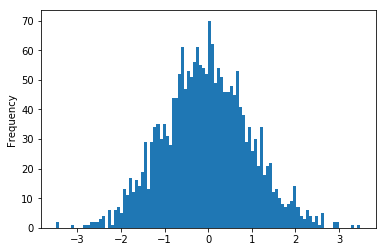

In [7]:
import pandas as pd
import numpy
pd.Series(numpy.random.normal(size=2000)).plot(kind='hist', bins=100)

In [9]:
from sympy import *
init_printing(use_unicode=True)
Matrix(np.matrix([1, 2]))

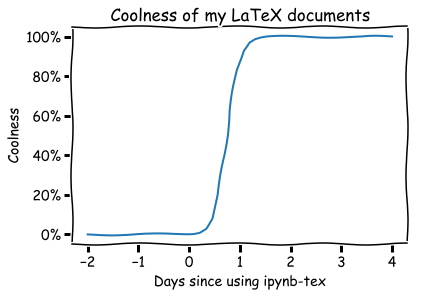

In [3]:
from __future__ import division
import numpy as np
import pandas as pd
from matplotlib import pyplot
def sigmoid(x):
     return 1 / (1 + np.exp(7*(-(x-1.2))))

with pyplot.xkcd():
    x = pd.Series(np.linspace(-2, 5), index=np.linspace(-2, 4))
    y = x.apply(sigmoid)
    ax = y.plot(title='Coolness of my LaTeX documents')
    ax.set_xlabel('Days since using ipynb-tex')
    ax.set_ylabel('Coolness')
    ticks = ax.get_yticks()
    perc_format = lambda x:'{:3.0f}%'.format(x*100)
    y = ax.set_yticklabels(map(perc_format, ticks))


In [14]:
print (pd.DataFrame([1]).to_latex())

\begin{tabular}{lr}
\toprule
{} &  0 \\
\midrule
0 &  1 \\
\bottomrule
\end{tabular}



In [22]:
from sympy import *
init_printing(use_latex='mathjax')
x, y, z = symbols('x y z')
i = Integral(x**2*sin(y), (x,0,1), (y,0,pi))
print (latex(i))

\int_{0}^{\pi}\int_{0}^{1} x^{2} \sin{\left (y \right )}\, dx\, dy
